In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['train.zip', 'test_images', 'sample_submission.csv.zip', 'description.md', 'test_images.zip', 'train_images', 'train_images.zip', 'test.zip', 'sample_submission.csv', 'test.csv.zip', 'train.csv', 'train.csv.zip', 'test.csv', 'aptos2019-blindness-detection']


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [4]:
import os
import json
from fastai.vision import *


In [5]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=None, max_zoom=1.05, max_lighting=None, max_warp=0,
                      xtra_tfms=[brightness(change=(0.3,0.7),p=0.75), contrast(scale=(0.5,1.0),p=0.75)])


NameError: name 'get_transforms' is not defined

In [6]:
data_path = "../input"
train_label_file = "train.csv"
train_images_folder = "train_images"
test_label_file = "test.csv"
test_images_folder = "test_images"
image_suffix = ".png"
split_pct = 0.2


In [7]:
fname = os.path.join(data_path, train_label_file)


In [8]:
df = pd.read_csv(fname)
df.head(5)


,id_code,diagnosis
0,2a2274bcb00a,0
1,eda29a9d78f3,0
2,789c60cba801,0
3,a07efb1ecfc0,0
4,44855f666225,2


In [9]:
np.random.seed(42)
src = (ImageList.from_csv(data_path, train_label_file, folder=train_images_folder, suffix=image_suffix)
       .split_by_rand_pct(split_pct)
       .label_from_df())
src


NameError: name 'ImageList' is not defined

In [10]:
aptos19_stats = ([0.42, 0.22, 0.075], [0.27, 0.15, 0.081])


In [11]:
data = (src.transform(tfms, size=224)
        .databunch(bs=64).normalize(aptos19_stats))
data.c, data.classes


NameError: name 'src' is not defined

In [12]:
data.show_batch(rows=3, figsize=(8, 8))


NameError: name 'data' is not defined

In [13]:
arch = models.densenet121


NameError: name 'models' is not defined

In [14]:
kappa = KappaScore()
kappa.weights = "quadratic"


NameError: name 'KappaScore' is not defined

In [15]:
learn = cnn_learner(data, arch, metrics=[kappa], model_dir="/tmp/model/")


NameError: name 'cnn_learner' is not defined

In [16]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


NameError: name 'learn' is not defined

In [17]:
lr = 1e-3


In [18]:
learn.fit_one_cycle(5, slice(lr))


NameError: name 'learn' is not defined

In [19]:
learn.recorder.plot_losses()


NameError: name 'learn' is not defined

In [20]:
learn.save('headonly')


NameError: name 'learn' is not defined

In [21]:
learn.load('headonly');


NameError: name 'learn' is not defined

In [22]:
learn.unfreeze()


NameError: name 'learn' is not defined

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


NameError: name 'learn' is not defined

In [24]:
class SaveBestModel(Recorder):
    def __init__(self, learn, name):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.save_method = self.save_when_loss
        
    def save_when_loss(self, metrics):
        loss = metrics[0]
        if self.best_loss == None or loss  self.best_loss:
            self.best_loss = loss
            self.learn.save(self.name, return_path=True)
            print("Saved the model for minimum loss {:.6f}".format(self.best_loss))
            
    def on_epoch_end(self, last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)


SyntaxError: invalid syntax (693098675.py, line 10)

In [25]:
best_model = SaveBestModel(learn, name = "best_model")


NameError: name 'SaveBestModel' is not defined

In [26]:
learn.fit_one_cycle(2, slice(5e-4, lr/5))


NameError: name 'learn' is not defined

In [27]:
learn.save('best_model')


NameError: name 'learn' is not defined

In [28]:
learn.load('best_model');


NameError: name 'learn' is not defined

In [29]:
sample_df = pd.read_csv('../input/sample_submission.csv')
sample_df.head()


,id_code,diagnosis
0,b460ca9fa26f,0
1,6cee2e148520,0
2,ca6842bfcbc9,0
3,6cbc3dad809c,0
4,a9bc2f892cb3,0


In [30]:
test = ImageList.from_df(sample_df, data_path, folder=test_images_folder, suffix=image_suffix)


NameError: name 'ImageList' is not defined

In [31]:
learn.data.add_test(test, label=test_label_file)


NameError: name 'learn' is not defined

In [32]:
preds = learn.get_preds(ds_type=DatasetType.Test)


NameError: name 'learn' is not defined

In [33]:
preds1, y = preds


NameError: name 'preds' is not defined

In [34]:
sample_df.diagnosis = preds1.argmax(1)
sample_df.head(10)


NameError: name 'preds1' is not defined

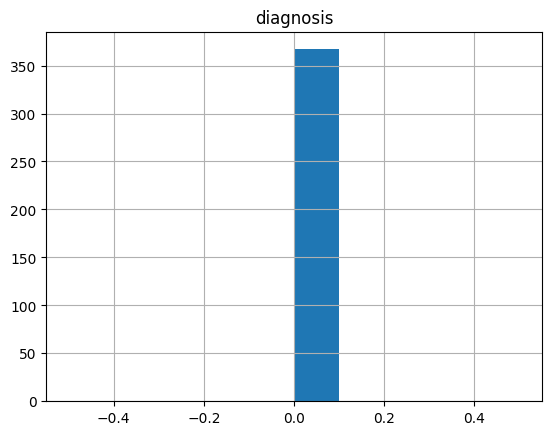

In [35]:
sample_df.to_csv('submission.csv',index=False)
_ = sample_df.hist()
